In [46]:
import numpy as np
import scipy as sp
import scipy.linalg as sp_linalg
import numpy.linalg as lin
import matplotlib.pyplot as plt

In [38]:
def QR_decomp(A):
    n = int(np.sqrt(np.size(A)))
    Q = np.eye(n)
    R = A

    for j in range(n):
        for i in range(j+1, n):
            T = np.eye(n)
            teta = np.arctan(-R[i][j]/R[j][j])
            T[i][i] = np.cos(teta)
            T[j][j] = T[i][i]
            T[i][j] = np.sin(teta)
            T[j][i] = -T[i][j]
            R = np.dot(T, R)
            Q = np.dot(Q, np.transpose(T))
    res = [Q, R]
    return res

In [32]:
def QR_solve(A, b):
    n = int(np.sqrt(np.size(A)))
    Q, R = QR_decomp(A)
    b = np.dot(np.transpose(Q), b)
    x = np.zeros(n) 
    for i in range(1, n + 1):
        x[-i] = (b[-i] - np.dot(R[-i][-i:], x[-i:])) / R[-i][-i]
    return x

In [33]:
def LU_decomp(A):
    n = int(np.sqrt(np.size(A)))
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    temp = 0
    
    for i in range(n):
        for j in range(i, n):
            for k in range(i):
                temp += L[j][k]*U[k][i]
            L[j][i] = A[j][i] - temp
            temp = 0
        for j in range(i, n):
            for k in range(i):
                temp += L[i][k]*U[k][j]
            U[i][j] = (A[i][j]-temp)/L[i][i]
            temp = 0
    res = [L, U]
    return res

In [9]:
# Создаем матрицу Гильберта
def hilb(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i][j] = 1/(i+j+1)
    return H

In [29]:
def LU_solve(A, b):
    n = int(np.sqrt(np.size(A)))
    x = np.zeros(n)
    y = np.zeros(n)
    temp = 0
    L, U = LU_decomp(A)
    y[0] = b[0]/L[0][0]
    for i in range(1, n):
        for k in range(n):
            if k == i:
                continue
            temp += L[i][k]*y[k]
        y[i] = (b[i] - temp)/L[i][i]
        temp = 0
    
    x[n-1] = y[n-1]
    for i in range(n-2, -1, -1):
        for k in range(n-1, -1, -1):
            if k == i:
                continue
            temp += U[i][k]*x[k]
        x[i] = y[i] - temp
        temp = 0           
    
    return x

In [23]:
A = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 8]])
b = np.array([2, 1, 1])

In [230]:
n = 15
A = hilb(n)
e = np.ones(n)
b = A@e

In [249]:
b = np.zeros(3)

In [26]:

LU_decomp(A)

[array([[ 1.,  0.,  0.],
        [ 4., -3.,  0.],
        [ 7., -6., -1.]]),
 array([[1., 2., 3.],
        [0., 1., 2.],
        [0., 0., 1.]])]

In [27]:
np.linalg.solve(A, b)

array([-3.66666667,  4.33333333, -1.        ])

In [34]:
LU_solve(A, b)

array([-3.66666667,  4.33333333, -1.        ])

In [39]:
QR_solve(A, b)

array([-3.66666667,  4.33333333, -1.        ])


 расчёт для матрицы Гильберта размерности 15 

погрешность LU_solve:     33.263291580810495
наименьшая погрешность d=1.1349336801622545e-05 достигается при alfa=4.0000000000000004e-11


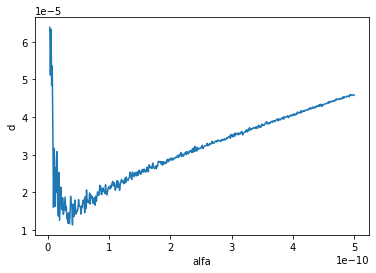

погрешность QR_solve:     13.023817859559905
наименьшая погрешность d=1.4843240774493645e-05 достигается при alfa=5.9e-11


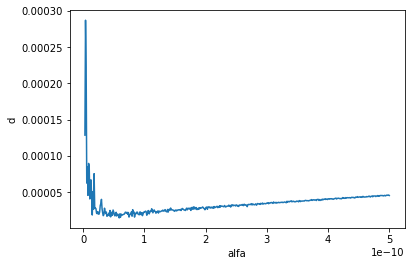


 расчёт для матрицы Гильберта размерности 25 

погрешность LU_solve:     137.35055014320082
наименьшая погрешность d=1.7720269355287488e-05 достигается при alfa=4.0000000000000004e-11


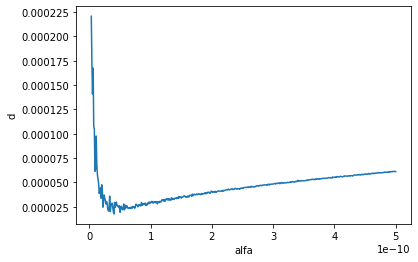

погрешность QR_solve:     313.0756606720071
наименьшая погрешность d=2.3894695954770578e-05 достигается при alfa=6.299999999999999e-11


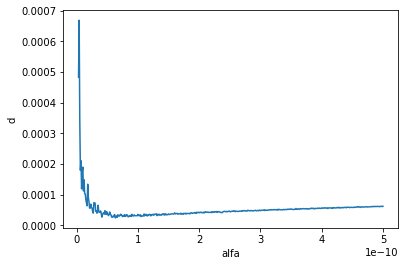


 расчёт для матрицы Гильберта размерности 30 

погрешность LU_solve:     266.04200365081994
наименьшая погрешность d=2.731948677645166e-05 достигается при alfa=4.8e-11


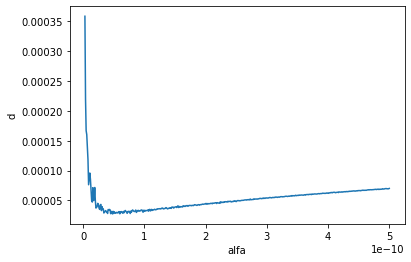

погрешность QR_solve:     1426.2021180977542
наименьшая погрешность d=2.654260714873105e-05 достигается при alfa=6.599999999999999e-11


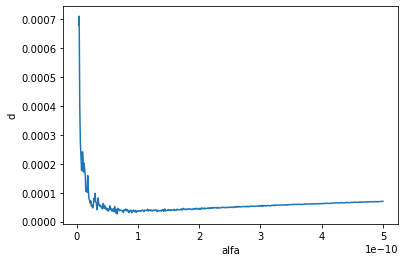

In [47]:
### Tests

tests = [15, 25, 30]
methods = [LU_solve, QR_solve]

for n in tests:
    e = np.ones(n)
    H = hilb(n)
    b = np.dot(H, e)
    print("\n расчёт для матрицы Гильберта размерности {0} \n".format(n))

    for method in methods:
        print("погрешность {0}:     {1}".format(str(method.__name__), str(lin.norm(method(H, b) - e))))

        alfa = 1e-12
        D = []
        m = [1, 0]
        x = []
        for i in range(2, 500):
            d = lin.norm(method(H + np.dot(alfa + i*alfa, np.eye(n)), b) - e)
            D.append(d)
            x.append(alfa + i*alfa)
            if d < m[0]:
                m = [d, alfa + i*alfa]
        print("наименьшая погрешность d={0} достигается при alfa={1}".format(m[0], m[1]))
        fig, ax = plt.subplots()
        plt.xlabel('alfa', fontsize=10)
        plt.ylabel("d", fontsize=10)
        ax.plot(x, D)
        plt.show()
